In [1]:
pip install scikit-learn

In [37]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [39]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:

print("\n job:", list(df.job))
print("\n First few rows of the dataset:")
print(df.head())


 job: ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'management', 'management', 'entrepreneur', 'retired', 'technician', 'admin.', 'admin.', 'technician', 'technician', 'services', 'retired', 'admin.', 'blue-collar', 'retired', 'services', 'blue-collar', 'management', 'blue-collar', 'services', 'retired', 'admin.', 'management', 'entrepreneur', 'management', 'technician', 'technician', 'management', 'admin.', 'blue-collar', 'management', 'technician', 'blue-collar', 'technician', 'admin.', 'admin.', 'services', 'management', 'blue-collar', 'retired', 'retired', 'admin.', 'self-employed', 'technician', 'technician', 'management', 'blue-collar', 'management', 'management', 'admin.', 'technician', 'entrepreneur', 'management', 'blue-collar', 'blue-collar', 'services', 'admin.', 'technician', 'blue-collar', 'services', 'blue-collar', 'management', 'retired', 'management', 'technician', 'blue-collar', 'blue-collar', 'services', 'management', 'blue-collar', 'technic

In [43]:

target = 'term_deposit'
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]



In [44]:

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column].astype(str))
        label_encoders[column] = le

if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y.astype(str))

<ipython-input-45-bc60051ebed4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))
<ipython-input-45-bc60051ebed4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))
<ipython-input-45-bc60051ebed4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [47]:

y_pred = clf.predict(X_test)
print("\n🎯 Model Accuracy:", accuracy_score(y_test, y_pred))


🎯 Model Accuracy: 0.8950125078173858


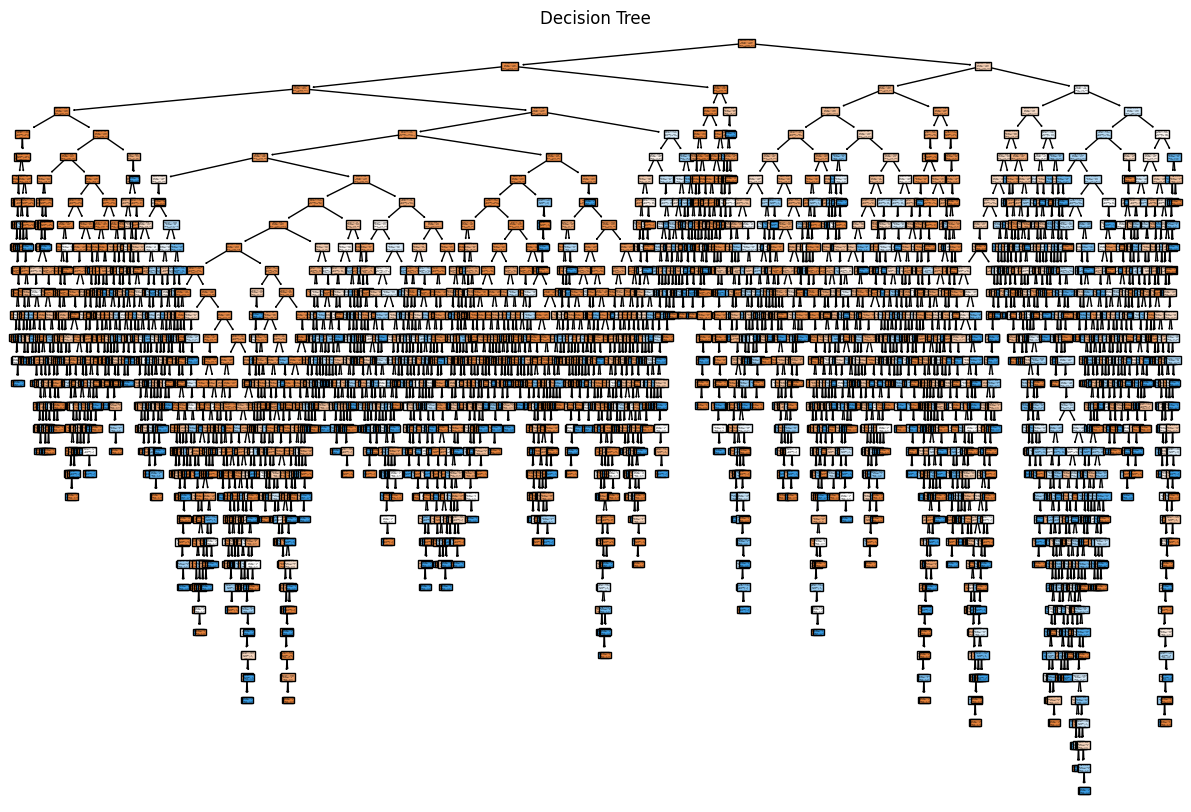

In [48]:
plt.figure(figsize=(15, 10))
plot_tree(clf,
          filled=True,
          feature_names=features,
          class_names=le_target.classes_)
plt.title("Decision Tree")
plt.show()